# __Open Weather Data__


## Northern and Souther Hemisphere Weather Analysis
Using pyhton and the Open Weather Data API, 544 random cities were choosen to investigate their weather relationships between each other and within their hemisphere.


### Obserable Trends
1. City Max Temperatures are hottest near the equator. This is proven through analysing the max temperatures in the Northern and Southern Hemipshere where in both graphs the temperatures includes for cities closer to latitude 0, which is the equator.

2. Humidity and Cloudiness are not strongly impacted by their location. When looking at both the combined and seperated by hemisphere graphs, there is very little evidence that city's humidity and cloudiness can be determined based on their location.

3. Wind Speed is more often lowest nearer the equator and gains speed in coordinates further from the equator. This can be seen when looking at both the combined and seperated by hemisphere graphs, the wind speeds are lowest at latitude 0 and increase as latitudes decrease and increase from the equator. 

In [1]:
#List of dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy import stats
from scipy.stats import linregress
from citipy import citipy

In [2]:
#Results Folder
weatherdata = "Results/citydata.csv"

## Generate Cities List

In [3]:
#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#Set numbers for accurancy checks
np.random.seed(42)

In [5]:
#Initializing list for citydata
citydata = []

In [6]:
#Creating a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [7]:
#Find nearest city for each lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Filter for adding only unique cities to list
    if city not in citydata:
        citydata.append(city)

#Print the city count to confirm sufficient number, which is 597
len(citydata)


597

## Perform API Calls

In [8]:
#Get access to data
from connect import weather_string

In [9]:
#Query URL with Open Weather Map API, unit type, and key
apicall = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_string

In [10]:
#API Call Results
data = []

In [11]:
#Start City Data Log
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

#Create counts retrieved and total
count = 0
record = 0

#Find city weather data and maintain count
for call, city in enumerate(citydata):
    count += 1
    record += 1 
    
    #Parse JSON
    recordurl = apicall + "&q=" + urllib.request.pathname2url(city)
    
    #Run API call
    try:
    
        #Parse JSON
        response = requests.get(recordurl).json()
    
        #Parse out the city weather data
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_maxtemp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloudiness = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
        
        #Append city weather data to city list
        data.append({"City": city,
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_maxtemp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_cloudiness,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})
    
        #Print city weather record status
        print(f"Retrieved Record: {count} of {record}, which is {city}.")
    
    #When city data cannot be found, skip and correct retrieved count
    except:
        print("Data Not Retrieved.")
        count -= 1
        pass
    
#Indicate City Data Log status
print("------------------------")
print("Data Retrievel Complete")
print("------------------------")

------------------------
Beginning Data Retrieval
------------------------
Retrieved Record: 1 of 1, which is henties bay.
Data Not Retrieved.
Retrieved Record: 2 of 3, which is bethel.
Retrieved Record: 3 of 4, which is saint-francois.
Retrieved Record: 4 of 5, which is ushuaia.
Retrieved Record: 5 of 6, which is mar del plata.
Retrieved Record: 6 of 7, which is kruisfontein.
Retrieved Record: 7 of 8, which is bronnoysund.
Data Not Retrieved.
Retrieved Record: 8 of 10, which is yumen.
Retrieved Record: 9 of 11, which is albany.
Retrieved Record: 10 of 12, which is dikson.
Retrieved Record: 11 of 13, which is ossora.
Retrieved Record: 12 of 14, which is vaini.
Retrieved Record: 13 of 15, which is castro.
Data Not Retrieved.
Retrieved Record: 14 of 17, which is vanimo.
Retrieved Record: 15 of 18, which is san cristobal.
Retrieved Record: 16 of 19, which is ulladulla.
Retrieved Record: 17 of 20, which is ewa beach.
Retrieved Record: 18 of 21, which is bluff.
Retrieved Record: 19 of 22, w

Retrieved Record: 164 of 180, which is sergeyevka.
Retrieved Record: 165 of 181, which is los llanos de aridane.
Retrieved Record: 166 of 182, which is paris.
Retrieved Record: 167 of 183, which is urusha.
Retrieved Record: 168 of 184, which is nome.
Retrieved Record: 169 of 185, which is salalah.
Retrieved Record: 170 of 186, which is victoria.
Retrieved Record: 171 of 187, which is ginir.
Retrieved Record: 172 of 188, which is abalak.
Retrieved Record: 173 of 189, which is varhaug.
Retrieved Record: 174 of 190, which is bambous virieux.
Data Not Retrieved.
Retrieved Record: 175 of 192, which is iracoubo.
Retrieved Record: 176 of 193, which is cockburn town.
Retrieved Record: 177 of 194, which is saint-pierre.
Retrieved Record: 178 of 195, which is hinton.
Data Not Retrieved.
Retrieved Record: 179 of 197, which is sterling.
Retrieved Record: 180 of 198, which is severo-kurilsk.
Retrieved Record: 181 of 199, which is camana.
Retrieved Record: 182 of 200, which is ixtapa.
Retrieved Reco

Retrieved Record: 326 of 354, which is cairns.
Retrieved Record: 327 of 355, which is san policarpo.
Retrieved Record: 328 of 356, which is urbano santos.
Retrieved Record: 329 of 357, which is sao joao da barra.
Retrieved Record: 330 of 358, which is zeya.
Retrieved Record: 331 of 359, which is hasaki.
Retrieved Record: 332 of 360, which is ulaangom.
Data Not Retrieved.
Retrieved Record: 333 of 362, which is luganville.
Retrieved Record: 334 of 363, which is austin.
Data Not Retrieved.
Retrieved Record: 335 of 365, which is khotynets.
Retrieved Record: 336 of 366, which is sarangani.
Retrieved Record: 337 of 367, which is kirovsk.
Retrieved Record: 338 of 368, which is athabasca.
Retrieved Record: 339 of 369, which is pisco.
Retrieved Record: 340 of 370, which is cikupa.
Retrieved Record: 341 of 371, which is sfantu gheorghe.
Data Not Retrieved.
Retrieved Record: 342 of 373, which is port lincoln.
Data Not Retrieved.
Data Not Retrieved.
Retrieved Record: 343 of 376, which is sur.
Retr

Retrieved Record: 487 of 536, which is hami.
Retrieved Record: 488 of 537, which is prince george.
Retrieved Record: 489 of 538, which is severnoye.
Data Not Retrieved.
Retrieved Record: 490 of 540, which is kaniama.
Retrieved Record: 491 of 541, which is myitkyina.
Retrieved Record: 492 of 542, which is winneba.
Retrieved Record: 493 of 543, which is leshukonskoye.
Retrieved Record: 494 of 544, which is boundiali.
Retrieved Record: 495 of 545, which is buzmeyin.
Retrieved Record: 496 of 546, which is dunedin.
Retrieved Record: 497 of 547, which is zyryanka.
Retrieved Record: 498 of 548, which is dobric.
Retrieved Record: 499 of 549, which is sao miguel do araguaia.
Retrieved Record: 500 of 550, which is puerto madero.
Retrieved Record: 501 of 551, which is raudeberg.
Retrieved Record: 502 of 552, which is aswan.
Retrieved Record: 503 of 553, which is mahon.
Retrieved Record: 504 of 554, which is ust-nera.
Retrieved Record: 505 of 555, which is vestmanna.
Retrieved Record: 506 of 556, 

### _Convert Raw Data to DataFrame_

In [12]:
#Pull the 544 records of 597 cities from JSON into a dataframe
weather = pd.DataFrame(data)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,henties bay,-22.1160,14.2845,60.01,95,0,3.00,NA,1615602849
1,bethel,41.3712,-73.4140,53.60,24,1,6.91,US,1615602849
2,saint-francois,46.4154,3.9054,45.00,70,75,6.91,FR,1615602850
3,ushuaia,-54.8000,-68.3000,46.40,87,75,42.57,AR,1615602850
4,mar del plata,-38.0023,-57.5575,64.99,76,0,2.30,AR,1615602850


In [13]:
#Find data columns for weather model
lat = weather["Lat"]
maxtemp = weather["Max Temp"]
humidity = weather["Humidity"]
cloudiness = weather["Cloudiness"]
windspeed = weather["Wind Speed"]

In [14]:
#Place city weather data into a csv file 
#weather.to_csv(weatherdata, index_label="City_ID")
weather.to_csv(weatherdata, index_label="City_ID")

In [15]:
#Confirm 544 record count
weather.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

### _Inspect the data and remove the cities where the humidity > 100%._

In [16]:
#Check humidity max of all city weather data
humidity.max()

100

In [17]:
#Confirm max humidity of city weather data
weather.sort_values(by="Humidity", ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
54,guymon,36.6828,-101.4816,42.80,100,90,11.50,US,1615602602
330,hasaki,35.7333,140.8333,55.99,100,75,16.11,JP,1615602908
494,buzmeyin,38.0507,58.2056,26.60,100,90,18.41,TM,1615603028
472,kasangulu,-4.5911,15.1708,73.40,100,40,4.61,CD,1615603019
243,lichinga,-13.3128,35.2406,64.40,100,75,5.75,MZ,1615602935
...,...,...,...,...,...,...,...,...,...
143,goure,13.9835,10.2704,80.01,12,27,5.99,NE,1615602898
373,damaturu,11.7470,11.9608,80.46,11,3,6.53,NG,1615602983
274,meadow lake,34.8014,-106.5436,57.20,6,20,13.80,US,1615602947
412,south valley,35.0101,-106.6781,59.00,6,20,13.80,US,1615602997


## Plotting the Data

### _Latitude vs. Temperature Plot_

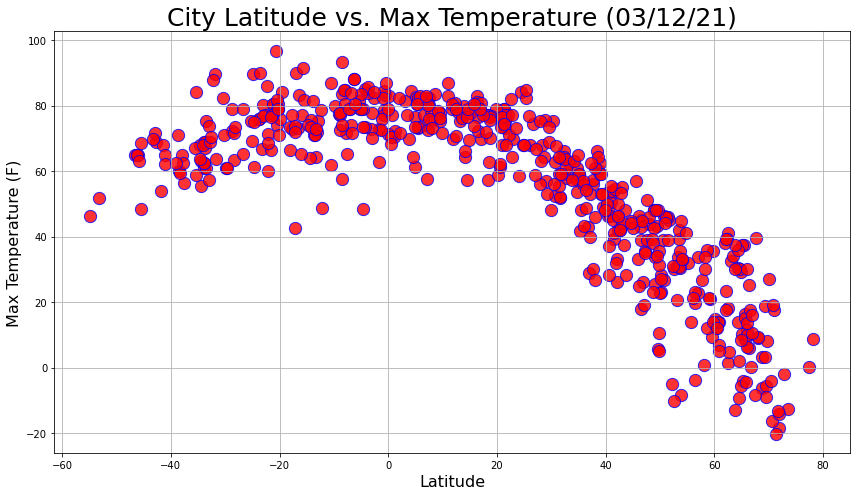

In [18]:
#Plot city weather data into a formatted scatter plot
scatter = plt.subplots(figsize=(12,7))
scatter= plt.scatter(lat, maxtemp,
           color="red",s=150, edgecolor= "blue", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})",fontsize=25)
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Max Temperature (F)",fontsize=16)
plt.grid(True)

#Save figure
plt.tight_layout()
plt.savefig("Results/LatTemp.png")
plt.show()

The relationship between City Latitude versus Max Temperature (F) is depicated here from analyzing 544 cities through Open Weather API Data with Python. According to this plot, the temperatures are higher between latitude -60 and 20.

### _Latitude vs. Humidity Plot_

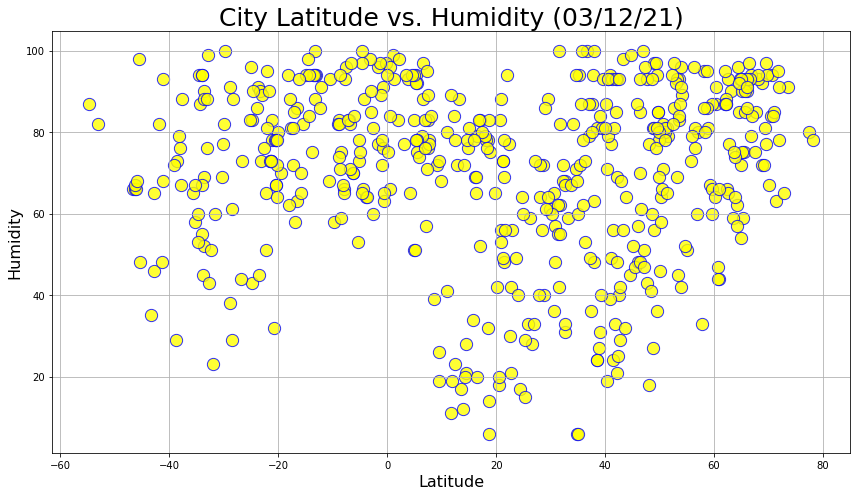

In [19]:
#Plot city weather data into a formatted scatter plot
scatter = plt.subplots(figsize=(12,7))
scatter= plt.scatter(lat, humidity,
           color="yellow",s=150, edgecolor= "blue", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})",fontsize=25)
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Humidity",fontsize=16)
plt.grid(True)

#Save figure
plt.tight_layout()
plt.savefig("Results/LatHumidity.png")
plt.show()

The relationship between City Latitude versus Humidity is depicated here from analyzing 544 cities through Open Weather API Data with Python. According to this plot, there's more humidity between latitudes 0 and 80.

### _Latitude vs. Cloudiness Plot_

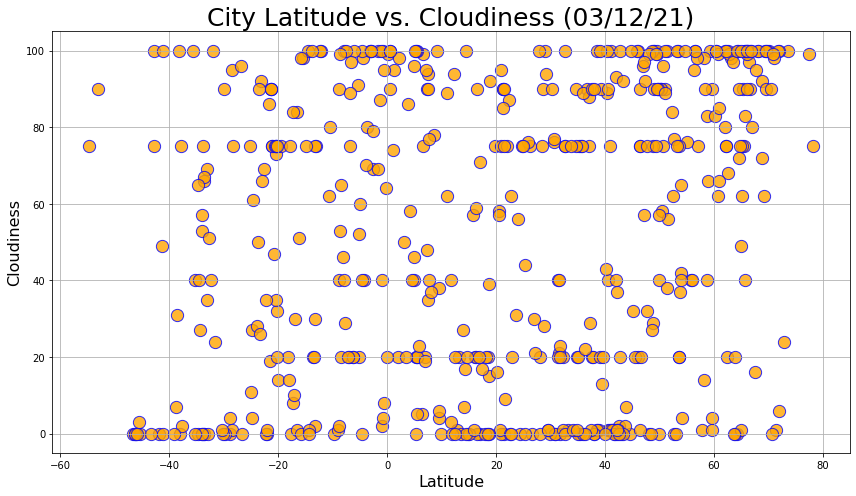

In [20]:
#Plot city weather data into a formatted scatter plot
scatter = plt.subplots(figsize=(12,7))
scatter= plt.scatter(lat, cloudiness,
           color="orange",s=150, edgecolor= "blue", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})",fontsize=25)
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Cloudiness",fontsize=16)
plt.grid(True)

#Save figure
plt.tight_layout()
plt.savefig("Results/LatCloudiness.png")
plt.show()

The relationship between City Latitude versus Cloudiness is depicated here from analyzing 544 cities through Open Weather API Data with Python. According to this plot, it appears more cloudy between latitudes 0 and 80.

### _Latitude vs. Wind Speed Plot_

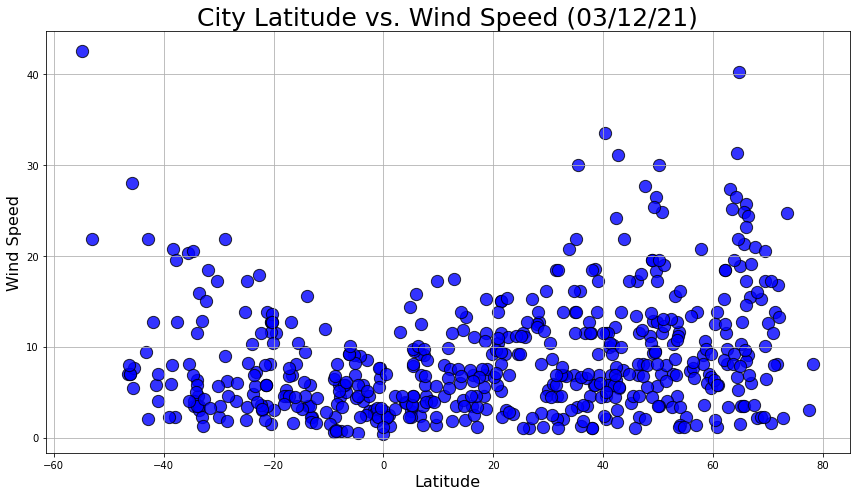

In [21]:
#Plot city weather data into a formatted scatter plot
scatter = plt.subplots(figsize=(12,7))
scatter= plt.scatter(lat, windspeed,
           color="blue",s=150, edgecolor= "black", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})",fontsize=25)
plt.xlabel("Latitude",fontsize=16)
plt.ylabel("Wind Speed",fontsize=16)
plt.grid(True)

#Save figure
plt.tight_layout()
plt.savefig("Results/LatWindSpeed.png")
plt.show()

The relationship between City Latitude versus Wind Speed is depicated here from analyzing 544 cities through Open Weather API Data with Python. According to this plot, the wind speed is higher between latitudes 0 and 80.

## Linear Regression

### _Divide Cities by Northern and Soutern Hemisphere_

In [22]:
#Find cities in the Northern Hemisphere, which is any latitude 0 and greater and totals 374 cities from this data set
northhem = weather[weather['Lat'] >= 0]
northhem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bethel,41.3712,-73.4140,53.60,24,1,6.91,US,1615602849
2,saint-francois,46.4154,3.9054,45.00,70,75,6.91,FR,1615602850
6,bronnoysund,65.4625,12.1997,37.40,75,75,3.44,NO,1615602851
7,yumen,40.2833,97.2000,53.31,19,89,33.51,CN,1615602852
8,albany,42.6001,-73.9662,42.01,40,2,3.00,US,1615602560
...,...,...,...,...,...,...,...,...,...
535,yerofey pavlovich,53.9667,121.9667,33.03,91,65,3.38,RU,1615603042
536,russkaya polyana,49.4170,31.9201,34.20,97,99,9.46,UA,1615603043
538,dhidhdhoo,6.8833,73.1000,83.07,76,19,12.53,MV,1615603043
540,kushima,31.4583,131.2333,64.40,42,40,6.91,JP,1615603044


In [23]:
#Find cities in the Southern Hemisphere, which is any latitude less than zero and totals 170 cities from this data set
southhem = weather[weather['Lat'] < 0]
southhem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,henties bay,-22.1160,14.2845,60.01,95,0,3.00,NA,1615602849
3,ushuaia,-54.8000,-68.3000,46.40,87,75,42.57,AR,1615602850
4,mar del plata,-38.0023,-57.5575,64.99,76,0,2.30,AR,1615602850
5,kruisfontein,-34.0033,24.7314,68.77,55,57,6.31,ZA,1615602851
11,vaini,-21.2000,-175.2000,80.60,78,75,13.80,TO,1615602852
...,...,...,...,...,...,...,...,...,...
534,imbituba,-28.2400,-48.6703,73.40,88,75,4.61,BR,1615603034
537,sola,-13.8833,167.5500,81.28,75,100,15.57,VU,1615603043
539,vredendal,-31.6683,18.5012,63.55,60,24,3.24,ZA,1615603044
541,eirunepe,-6.6603,-69.8736,71.74,97,97,0.72,BR,1615603045


### _Prepare linear regression models_

In [44]:
#Calculate and print the correlation coefficient of the linear regression models
def plotRegression(hemisphere,col,titlehem,titley,file):
    
    (slope, intercept,rvalue, pvalue, stderr)= linregress(hemisphere["Lat"],hemisphere[col])
    regressionline = hemisphere["Lat"]* slope + intercept
    line = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    print(f"The correlation coefficient is: {round(rvalue,2)}")
    
    regression = plt.subplots(figsize=(12,7))
    regression = plt.scatter(hemisphere["Lat"],
                         hemisphere[col],color="pink",s=150,edgecolor="blue",
                         linewidth=1, marker="o", label="City")
    plt.plot(hemisphere["Lat"],regressionline, color='blue')
    t = plt.annotate(line,(hemisphere["Lat"].min(),hemisphere[col].min()),color='blue',
                     backgroundcolor = 'w',fontsize=16)
    t.set_bbox(dict(#facecolor='red', 
                    alpha=.03,
                    edgecolor='black'))
    plt.title(f"{titlehem}: City Latitude vs. {titley} ({time.strftime('%x')})",fontsize=25)
    plt.ylabel(titley,fontsize=16)
    plt.xlabel("Latitude",fontsize=16)
    plt.tight_layout()
    plt.savefig(file,bbox_inches="tight")
    plt.show()

###  _Northern Hemisphere - Max Temp vs. Latitude Linear Regression_

The correlation coefficient is: -0.9


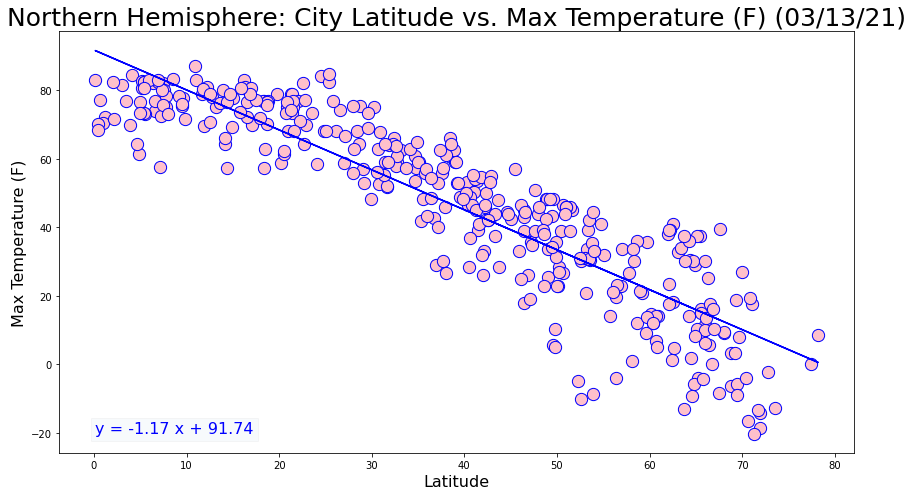

In [45]:
#Linear Regression for Northern Hempishere latitudes versus max temperature
plotRegression(northhem,"Max Temp","Northern Hemisphere","Max Temperature (F)","Results/NH_LatTemp.png")

There is a strong negative linear relationship between city latitude and max temperatures in the Northern Hemisphere. As the latitude increases, the temperature decreases.

###  _Southern Hemisphere - Max Temp vs. Latitude Linear Regression_

The correlation coefficient is: 0.5


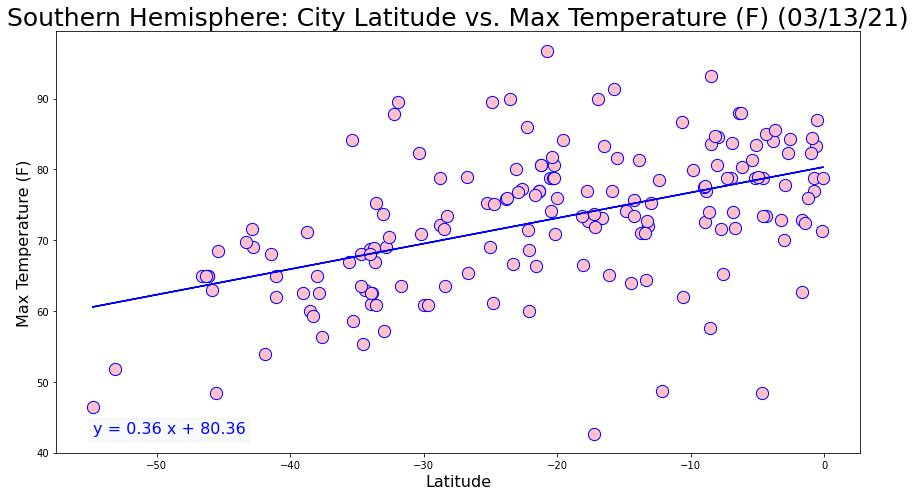

In [46]:
#Linear Regression for the Southern Hempishere latitudes versus max temperature
plotRegression(southhem,"Max Temp","Southern Hemisphere","Max Temperature (F)","Results/SH_LatTemp.png")

There is a moderate positive linear relationship between city latitude and max temperatures in the Southern Hemisphere. As the latitude increases, the temperatures increase.

### _Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression_

The correlation coefficient is: 0.22


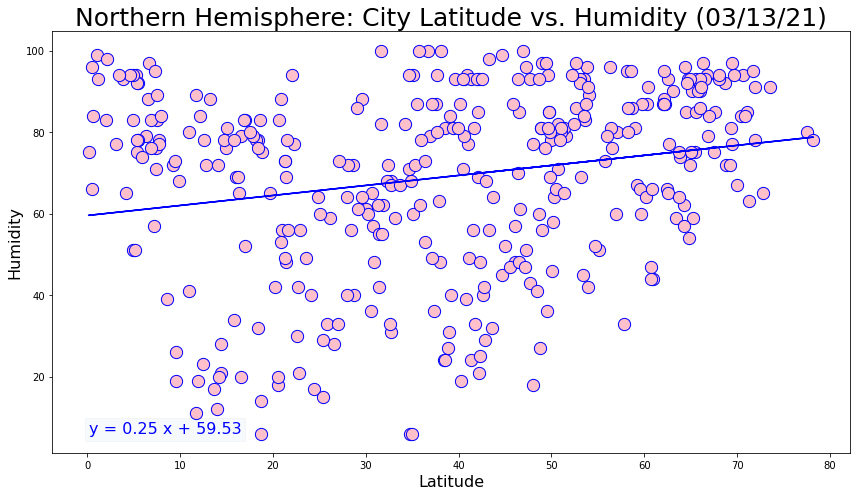

In [47]:
#Linear Regression for the Northern Hempishere latitudes versus humidity
plotRegression(northhem,"Humidity","Northern Hemisphere","Humidity","Results/NH_LatHum.png")

There is a very weak positive linear relationship between city latitude and humidity in the Northern Hemisphere. As the latitude increases, the humidity slightly increases.

###  _Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression_

The correlation coefficient is: 0.28


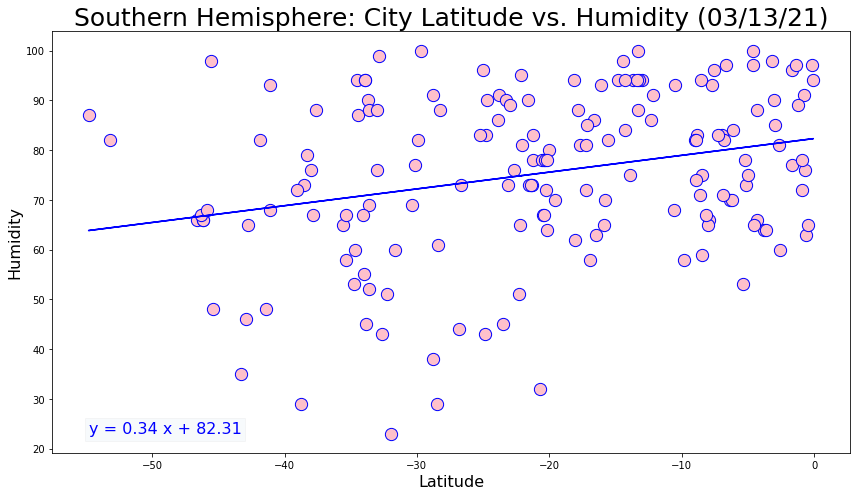

In [48]:
#Linear Regression for the Southern Hempishere latitudes versus humidity
plotRegression(southhem,"Humidity","Southern Hemisphere","Humidity","Results/SH_LatHum.png")

There is a very weak positive linear relationship between city latitude and humidity in the Southern Hemisphere. As the latitude increases, the humidity slightly increases.

###  _Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression_

The correlation coefficient is: 0.27


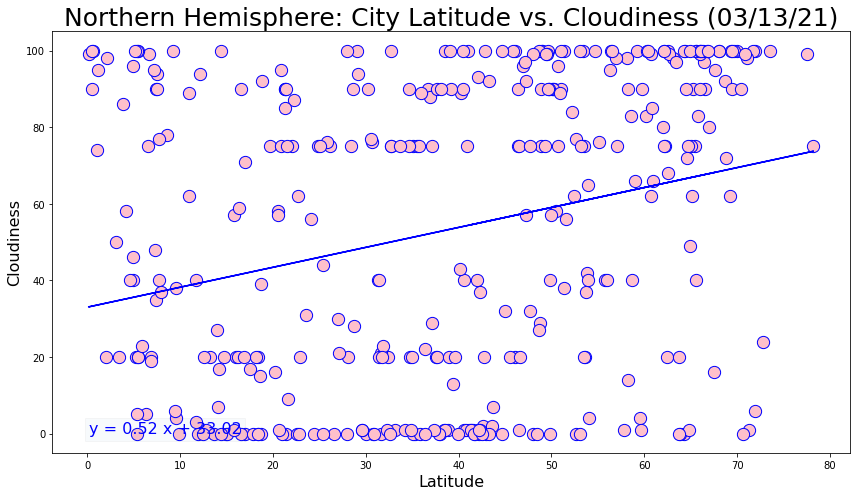

In [49]:
#Linear Regression for the Northern Hempishere latitudes versus cloudiness
plotRegression(northhem,"Cloudiness","Northern Hemisphere","Cloudiness","Results/NH_LatCloud.png")

There is a very weak positive linear relationship between city latitude and cloudiness in the Northern Hemisphere. As the latitude increases, cloudiness slightly increases.

###  _Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression_

The correlation coefficient is: 0.27


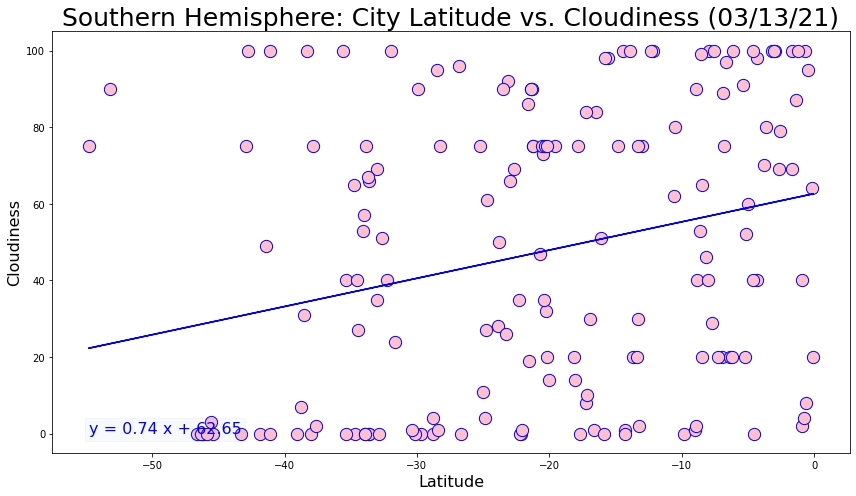

In [50]:
#Linear Regression for the Southern Hempishere latitudes versus cloudiness
plotRegression(southhem,"Cloudiness","Southern Hemisphere","Cloudiness","Results/SH_LatCloud.png")

There is a very weak positive linear relationship between city latitude and cloudiness in the Southern Hemisphere. As the latitude increases, the cloudiness slightly increases.

###  _Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression_

The correlation coefficient is: 0.29


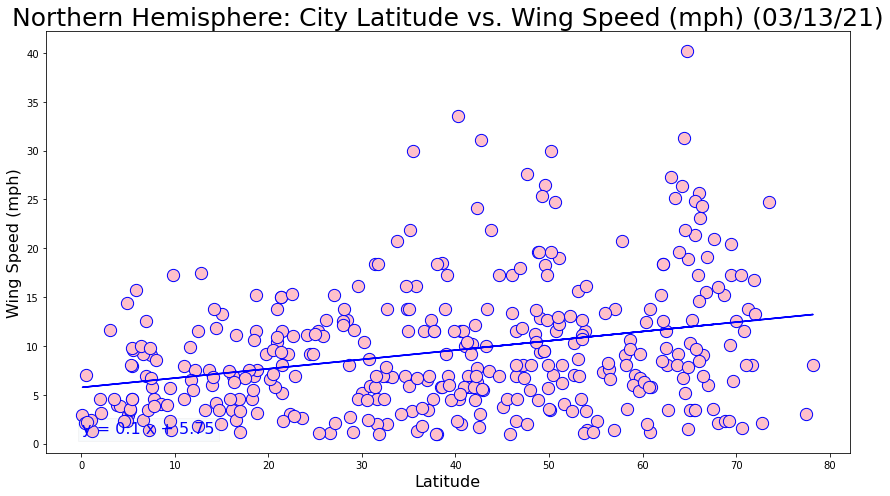

In [51]:
#Linear Regression for the Northern Hempishere latitudes versus wind speed
plotRegression(northhem,"Wind Speed","Northern Hemisphere","Wing Speed (mph)","Results/NH_LatSpeed.png")

There is a very weak positive linear relationship between city latitude and wind speed in the Northern Hemisphere. As the latitude increases, the wind speed slightly increases.

###  _Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression_

The correlation coefficient is: -0.41


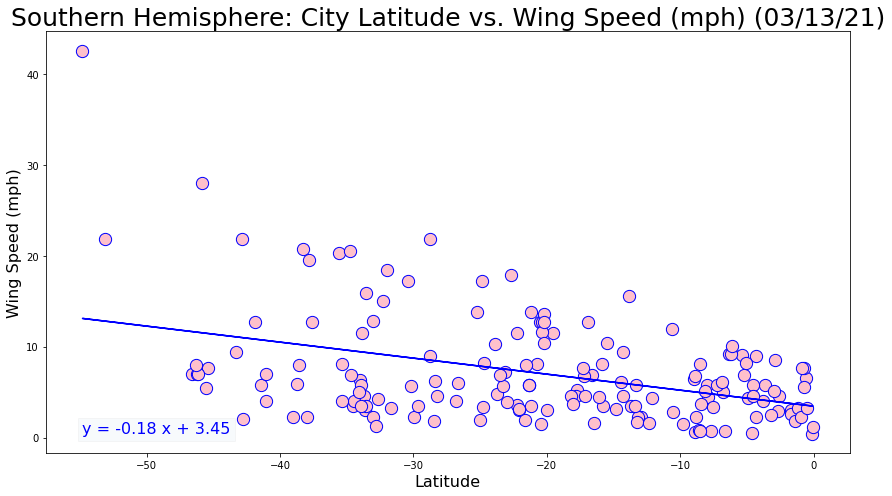

In [52]:
#Linear Regression for the Southern Hempishere latitudes versus wind speed
plotRegression(southhem,"Wind Speed","Southern Hemisphere","Wing Speed (mph)","Results/SH_LatSpeed.png")

There is a weak negative linear relationship between city latitude and wind speed in the Southern Hemisphere. As the latitude increases, the wind speed decreases.